In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import numpy as np

## Display 10 random typical and novel images


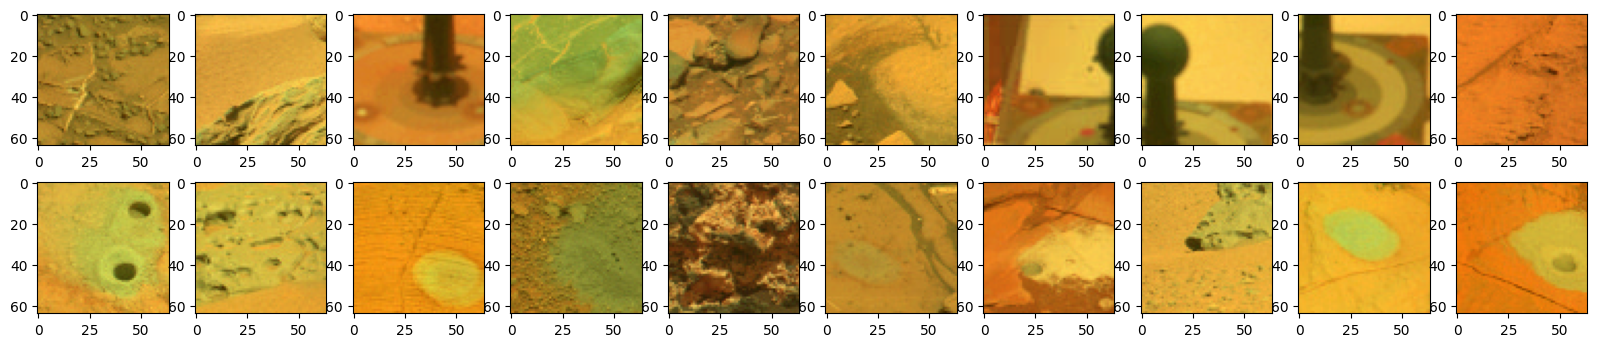

In [5]:
N = 10

fig, axes = plt.subplots(ncols=N, nrows=2, figsize=(20, 4))
test_dir_typical = "../dataset/test_typical"
test_dir_novel = "../dataset/test_novel/all"

typical_imgs = np.random.choice(os.listdir(test_dir_typical), N, replace=False)
novel_imgs = np.random.choice(os.listdir(test_dir_novel), N, replace=False)

for i in range(N):

    img = np.load(os.path.join(test_dir_typical, typical_imgs[i]))
    img_novel = np.load(os.path.join(test_dir_novel, novel_imgs[i]))

    img = np.take(img, [2, 0, 1], axis=2)
    axes[0][i].imshow(np.interp(img, (img.min(), img.max()), (0, 1)))

    img_novel = np.take(img_novel, [2, 0, 1], axis=2)
    axes[1][i].imshow(np.interp(img_novel, (img_novel.min(), img_novel.max()), (0, 1)))

In [6]:
# size of the images
img = np.load(os.path.join(test_dir_typical, typical_imgs[0]))
print(img.shape)

(64, 64, 6)


In [ ]:
from vae import VariationalAutoencoder
import pandas as pd
from torch.utils.data import DataLoader
import pyro
from train_vae import train_ae


pyro.enable_validation(False)

batch_size = 32
epochs = 1

n_hidden_features = 128
n_latent_features = 10
lr = 1e-2

results = []

vae_model = VariationalAutoencoder(
    n_data_features=64 * 64 * 6,
    n_encoder_hidden_features=n_hidden_features,
    n_decoder_hidden_features=n_hidden_features,
    n_latent_features=n_latent_features,
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, drop_last=False
)

loss_fn = pyro.infer.Trace_ELBO().differentiable_loss
loss_fn_args = (vae_model.model, vae_model.guide)
print(f"\n{n_latent_features=}, {n_hidden_features=}, {lr=}")

res = train_ae(
    vae_model,
    epochs=epochs,
    train_loader=train_dataloader,
    val_loader=val_loader,
    lr=lr,
    loss_fn=loss_fn,
    loss_fn_args=loss_fn_args,
)

In [3]:
train_dataset = MNIST(root="data", download=True, train=True, transform=ToTensor())
val_dataset = MNIST(root="data", download=True, train=False, transform=ToTensor())

# limiting the dataset
indices = np.random.permutation(len(train_dataset.data))[:10_000]
train_dataset.data = train_dataset.data[indices]
train_dataset.targets = train_dataset.targets[indices]

NameError: name 'MNIST' is not defined


n_latent_features=10, n_hidden_features=128, lr=0.01


epoch: 100%|██████████| 1/1 [00:05<00:00,  5.58s/it]


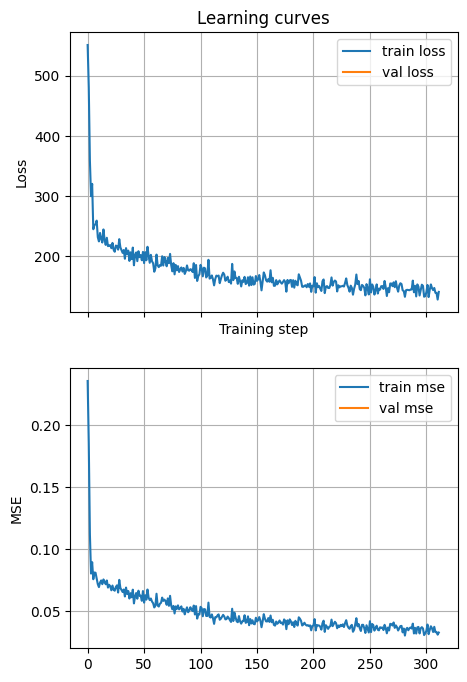

In [10]:
from vae import VariationalAutoencoder
import pandas as pd
from torch.utils.data import DataLoader
import pyro
from train_vae import train_ae


pyro.enable_validation(False)

batch_size = 32
epochs = 1

n_hidden_features = 128
n_latent_features = 10
lr = 1e-2

results = []

vae_model = VariationalAutoencoder(
    n_data_features=28 * 28,  # MNIST pixels
    n_encoder_hidden_features=n_hidden_features,
    n_decoder_hidden_features=n_hidden_features,
    n_latent_features=n_latent_features,  # how many features will be used to represent input
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, drop_last=False
)

loss_fn = pyro.infer.Trace_ELBO().differentiable_loss
loss_fn_args = (vae_model.model, vae_model.guide)
print(f"\n{n_latent_features=}, {n_hidden_features=}, {lr=}")

res = train_ae(
    vae_model,
    epochs=epochs,
    train_loader=train_dataloader,
    val_loader=val_loader,
    lr=lr,
    loss_fn=loss_fn,
    loss_fn_args=loss_fn_args,
)

In [6]:
import torch

# save the model
torch.save(vae_model.state_dict(), "vae_model.pth")

In [9]:
# load the model
vae_model = VariationalAutoencoder(
    n_data_features=28 * 28,  # MNIST pixels
    n_encoder_hidden_features=128,
    n_decoder_hidden_features=128,
    n_latent_features=10,  # how many features will be used to represent input
)
vae_model.load_state_dict(torch.load("vae_model.pth"))

<All keys matched successfully>